In [ ]:
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/MyDrive/dataset/'

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [ ]:
dataset_A = url + 'Dataset A.zip'
with ZipFile(dataset_A, 'r') as zip:
  zip.extractall()

In [ ]:
PATH = '/content/'
data_labels = pd.read_csv(PATH + 'training-a.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(19702, 2)


,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
TRAIN_PATH = url + 'exp2'
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-a')

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  19702


# **Experiment 2**

In [ ]:
#Batch Parameters
batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200
output_dim = 10

learning_rate = 1e-4

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

20


In [ ]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:789
Test dataloader:197


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.Tanh()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Tanh()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Softmax(dim=0)

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.Tanh()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.Tanh()

        #7th Hidden Layer
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        self.relu_7 = nn.Tanh()

 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)

        out  = self.linear_7(out)
        out = self.relu_7(out)

        
        
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): Tanh()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): Tanh()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): Softmax(dim=0)
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): Tanh()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): Tanh()
  (linear_7): Linear(in_features=200, out_features=200, bias=True)
  (relu_7): Tanh()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 500. Loss: 1.839442253112793. Accuracy: 26.269035532994923
Epoch:  2
Iteration: 1000. Loss: 1.589113473892212. Accuracy: 30.279187817258883
Iteration: 1500. Loss: 1.7267143726348877. Accuracy: 30.17766497461929
Epoch:  3
Iteration: 2000. Loss: 1.713083028793335. Accuracy: 31.548223350253807
Epoch:  4
Iteration: 2500. Loss: 1.4979954957962036. Accuracy: 30.913705583756347
Iteration: 3000. Loss: 1.5385159254074097. Accuracy: 31.97969543147208
Epoch:  5
Iteration: 3500. Loss: 1.4805419445037842. Accuracy: 30.913705583756347
Epoch:  6
Iteration: 4000. Loss: 1.5922597646713257. Accuracy: 32.233502538071065
Iteration: 4500. Loss: 1.4124940633773804. Accuracy: 32.131979695431475
Epoch:  7
Iteration: 5000. Loss: 1.6790164709091187. Accuracy: 32.53807106598985
Iteration: 5500. Loss: 1.3304896354675293. Accuracy: 48.3756345177665
Epoch:  8
Iteration: 6000. Loss: 1.127600908279419. Accuracy: 54.390862944162436
Epoch:  9
Iteration: 6500. Loss: 1.1667240858078003. Accuracy: 57.

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/dataset/model_base1.pkl')

[1.839442253112793, 1.589113473892212, 1.7267143726348877, 1.713083028793335, 1.4979954957962036, 1.5385159254074097, 1.4805419445037842, 1.5922597646713257, 1.4124940633773804, 1.6790164709091187, 1.3304896354675293, 1.127600908279419, 1.1667240858078003, 0.7852325439453125, 0.8626793026924133, 1.3678828477859497, 1.0355112552642822, 0.7915505170822144, 0.8908799290657043, 0.6164563894271851, 0.8614500164985657, 0.7688437700271606, 0.8813177347183228, 1.0176571607589722, 1.132914423942566, 0.7701396346092224, 0.613584578037262, 0.6295251250267029, 0.5726925134658813, 1.0657498836517334, 1.0054880380630493]


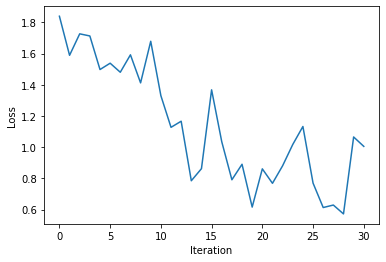

In [ ]:
print(iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()